You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)


Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Target Variable Outcome value Counts

In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot: title={'center': 'Value count for Outcome'}, xlabel='Outcome', ylabel='value counts'>

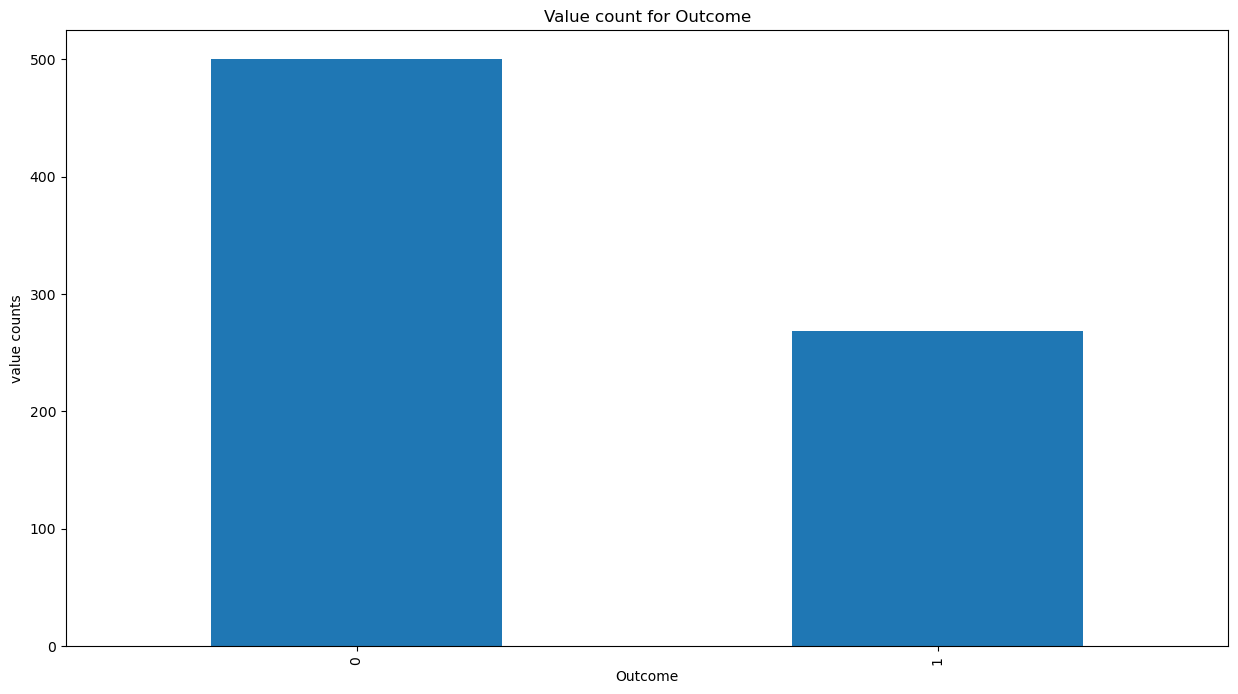

In [8]:
df['Outcome'].value_counts().plot(kind= "bar",
                                    xlabel = "Outcome",
                                     ylabel = "value counts",
                                     title = "Value count for Outcome",
                                     figsize = (15,8))

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
corr_metrix = df.corr()

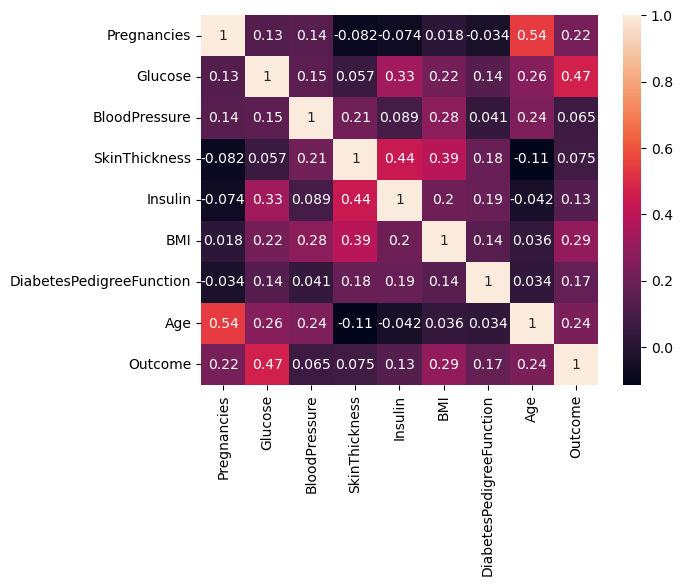

In [11]:
sns.heatmap(corr_metrix, annot= True)
plt.show()

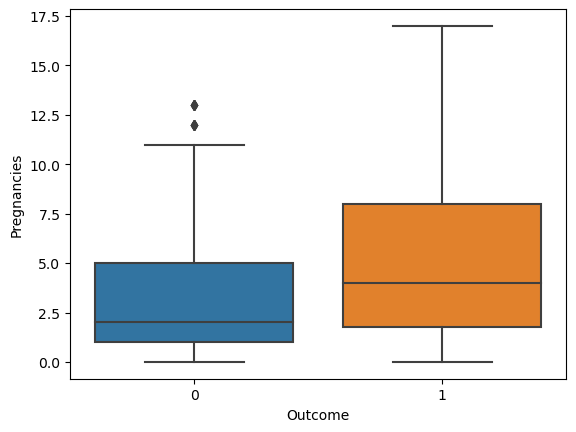

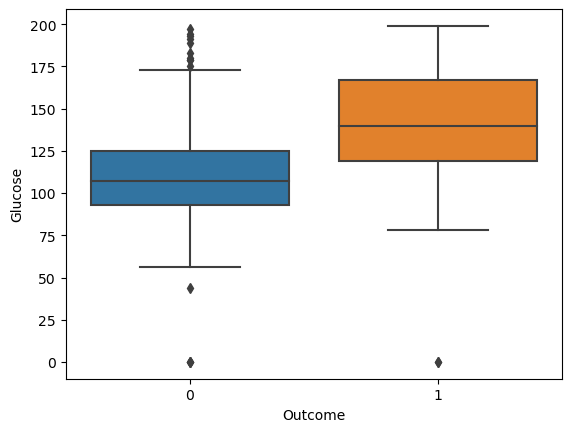

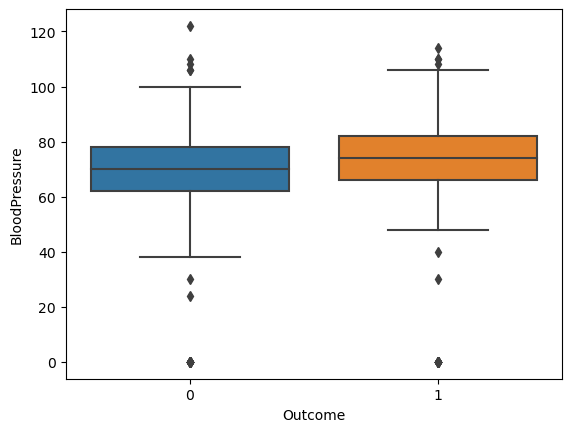

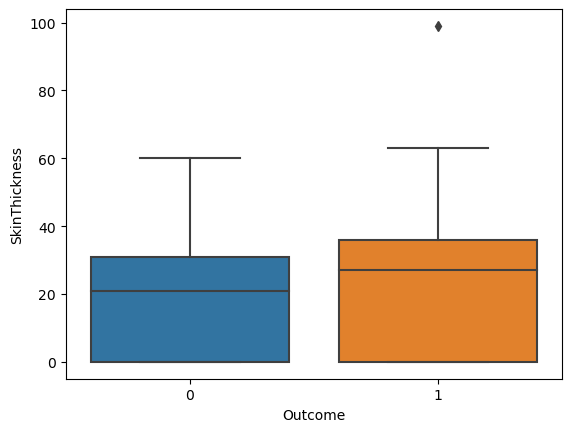

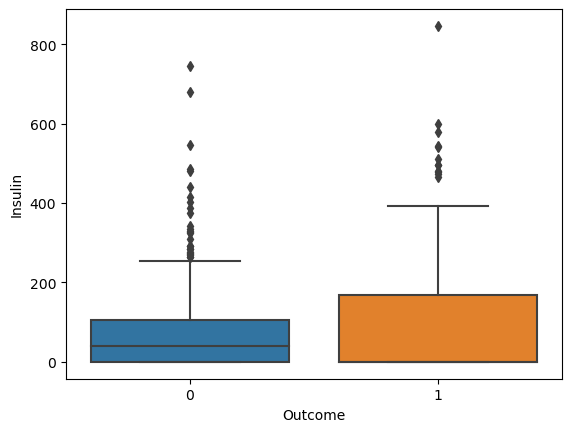

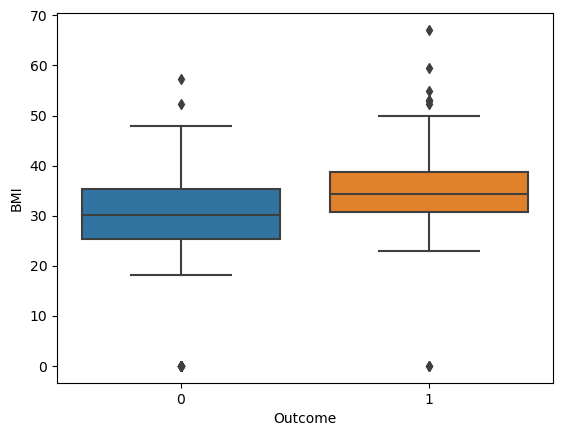

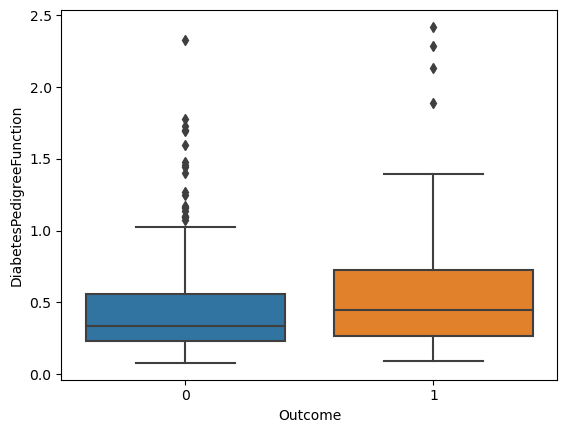

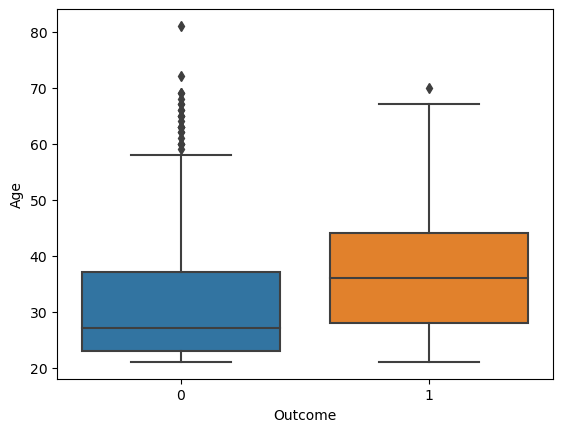

In [12]:
for col in df.columns[:-1]:
    sns.boxplot(x= "Outcome", y= col, data= df)
    plt.show()

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [13]:
df = df.dropna()

In [14]:
df["Outcome"] = df["Outcome"].apply(lambda x: 1 if x == 1 else 0)

In [16]:
df['Outcome'].uniqueue()

array([1, 0])

In [17]:
import numpy as np

In [20]:
def remove_outliers(df, columns):
    Q1 = np.percentile(df[columns], 25)
    Q3 = np.percentile(df[columns], 75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[columns] >= lower_bound) & (df[columns] <= upper_bound)]

for col in df.columns[:-1]:
    df = remove_outliers(df, col)
    

In [22]:
df = pd.get_dummies(df)

In [27]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size= 0.2, random_state= 42)

train_feature = train_data.drop("Outcome", axis= 1)
train_target = train_data['Outcome']

test_feature = test_data.drop("Outcome", axis= 1)
test_target = test_data['Outcome']

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
clf = DecisionTreeClassifier()

In [31]:
params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, 9],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [34]:
grid_search = GridSearchCV(clf, params, cv=5)
grid_search.fit(train_feature, train_target)

# Print the best hyperparameters found by grid search
print(grid_search.best_params_)

# Train the decision tree model with the best hyperparameters on the training set
best_clf = DecisionTreeClassifier(**grid_search.best_params_)
best_clf.fit(train_feature, train_target)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [36]:
from sklearn import metrics

# Make predictions on the test set
test_predictions = best_clf.predict(test_feature)

# Calculate accuracy, precision, recall, and F1 score
accuracy = metrics.accuracy_score(test_target, test_predictions)
precision = metrics.precision_score(test_target, test_predictions)
recall = metrics.recall_score(test_target, test_predictions)
f1_score = metrics.f1_score(test_target, test_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.7421875
Precision: 0.5555555555555556
Recall: 0.4166666666666667
F1 Score: 0.4761904761904762


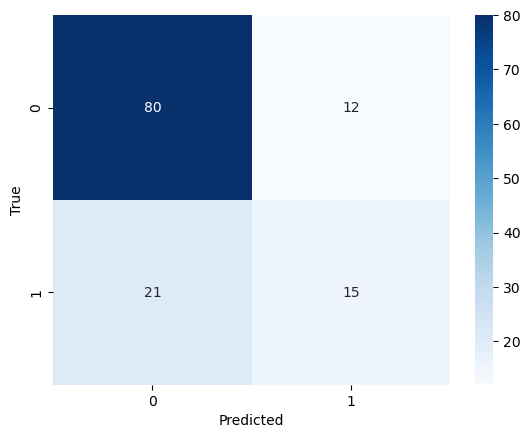

In [37]:
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_target, test_predictions)

# Plot the confusion matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

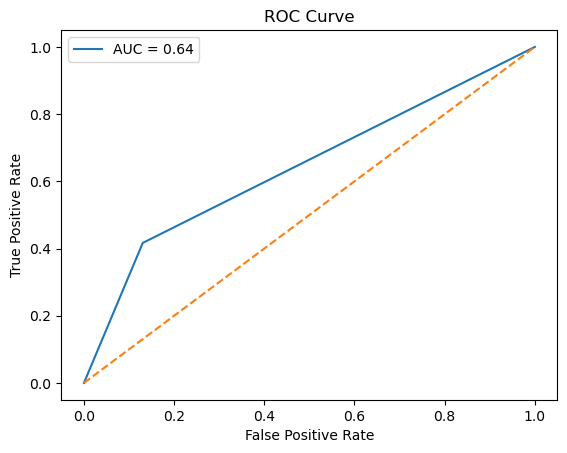

In [38]:

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = metrics.roc_curve(test_target, test_predictions)

# Calculate the AUC (area under the curve) of the ROC curve
auc = metrics.roc_auc_score(test_target, test_predictions)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()